<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Entrega_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-48-2791279372.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Feriado'] = df['Feriado'].replace({
/tmp/ipython-input-48-2791279372.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


=== REGRESS√ÉO LINEAR OLS ===
MAE  : 57.65
RMSE : 75.33
R¬≤   : -0.8469
                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     521.6
Date:                Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:57:34   Log-Likelihood:                -3989.1
No. Observations:                 852   AIC:                             8000.
Df Residuals:                     841   BIC:                             8052.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


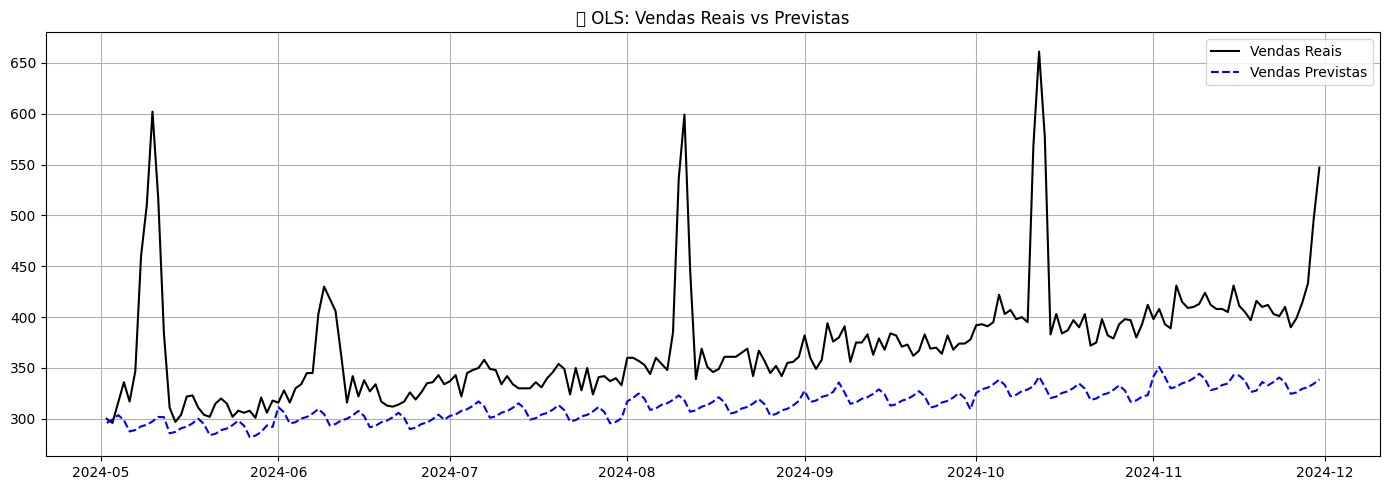

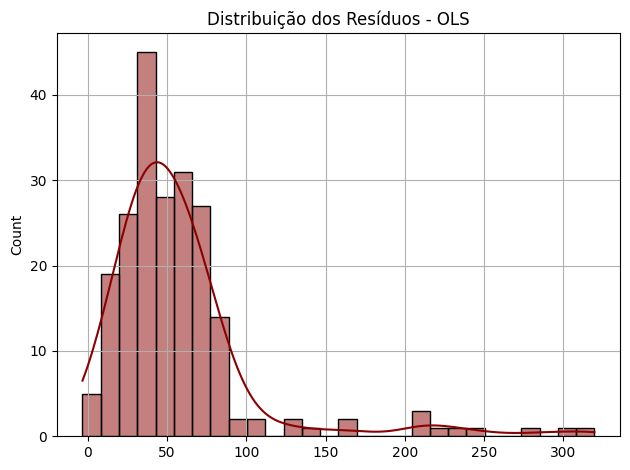


üìè Shapiro-Wilk: Estat√≠stica = 0.6898, p-valor = 0.0000
‚ö†Ô∏è N√£o normal

üìå VIF:
                         Vari√°vel       VIF
4                         Feriado       inf
8            Dia_da_Semana_Quinta       inf
7            Dia_da_Semana_Quarta       inf
6             Dia_da_Semana_Ter√ßa       inf
5           Dia_da_Semana_Segunda       inf
13                  Fim de Semana       inf
14     Dia_da_Semana_Quarta-feira       inf
15     Dia_da_Semana_Quinta-feira       inf
16    Dia_da_Semana_Segunda-feira       inf
9             Dia_da_Semana_Sexta       inf
10         Final_de_Semana_S√°bado       inf
11        Final_de_Semana_Domingo       inf
12                      Feriado.1       inf
17      Dia_da_Semana_Sexta-feira       inf
18           Dia_da_Semana_S√°bado       inf
19      Dia_da_Semana_Ter√ßa-feira       inf
20  Final_de_Semana_Fim de Semana       inf
1                             Ano  1.099928
2                             M√™s  1.099209
3                       

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [48]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro

# üì• Leitura dos Dados
df = pd.read_excel('/content/Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# ‚úÖ Pr√©-processamento da coluna Feriado
df['Feriado'] = df['Feriado'].replace({
    'Sim': 1, 'N√£o': 0, 'Feriado': 1, 'Dia comum': 0
}).astype(int)

# üéØ Separar vari√°veis
X = df.drop(columns=['Vendas'])
y = df['Vendas'].astype(float)

# ‚öôÔ∏è Transformar vari√°veis categ√≥ricas em dummies
X = pd.get_dummies(X, drop_first=True).astype(float)
X = sm.add_constant(X)

# üîÄ Divis√£o treino/teste 80/20
n_test = int(len(df) * 0.2)
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]

# üìà Regress√£o Linear OLS
modelo = sm.OLS(y_train, X_train).fit()
y_pred = modelo.predict(X_test)

# üìä Avalia√ß√£o
print("=== REGRESS√ÉO LINEAR OLS ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R¬≤   : {r2_score(y_test, y_pred):.4f}")
print(modelo.summary())

# üìà Gr√°fico Vendas Reais vs Previstas
plt.figure(figsize=(14, 5))
plt.plot(y_test.index, y_test, label='Vendas Reais', color='black')
plt.plot(y_test.index, y_pred, label='Vendas Previstas', linestyle='--', color='blue')
plt.title('üìä OLS: Vendas Reais vs Previstas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# üìâ Gr√°fico Res√≠duos
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, color='darkred')
plt.title('Distribui√ß√£o dos Res√≠duos - OLS')
plt.grid(True)
plt.tight_layout()
plt.show()

# üìè Teste de Normalidade
stat, p = shapiro(residuos)
print(f"\nüìè Shapiro-Wilk: Estat√≠stica = {stat:.4f}, p-valor = {p:.4f}")
print("‚úÖ Normal" if p > 0.05 else "‚ö†Ô∏è N√£o normal")

# üß† VIF
vif_df = pd.DataFrame()
vif_df['Vari√°vel'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nüìå VIF:")
print(vif_df.sort_values('VIF', ascending=False))

# üîÆ Previs√£o para 01‚Äì07 Dezembro 2024
datas_futuro = pd.date_range(start='2024-12-01', end='2024-12-07')
df_futuro = pd.DataFrame({'Data': datas_futuro})
df_futuro['Ano'] = df_futuro['Data'].dt.year
df_futuro['M√™s'] = df_futuro['Data'].dt.month
df_futuro['Dia'] = df_futuro['Data'].dt.day
df_futuro['Dia_da_Semana'] = df_futuro['Data'].dt.day_name()
df_futuro['Feriado'] = 0
df_futuro['Fim de Semana'] = df_futuro['Dia_da_Semana'].isin(['Saturday', 'Sunday']).astype(int)

# Criar vari√°veis dummies compat√≠veis com treino
df_futuro = pd.get_dummies(df_futuro, columns=['Dia_da_Semana'], drop_first=True)

# Adicionar vari√°veis ausentes do treino (com zero)
for col in X_train.columns:
    if col not in df_futuro.columns:
        df_futuro[col] = 0

# Garantir ordem correta
X_futuro = df_futuro[X_train.columns].astype(float)

# Prever
y_pred_futuro = modelo.predict(X_futuro)

# üìä Resultado
df_resultado = pd.DataFrame({
    'Data': datas_futuro,
    'Previs√£o_Vendas': y_pred_futuro
}).set_index('Data')



/tmp/ipython-input-49-1279019834.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Feriado'] = df['Feriado'].replace({'Sim': 1, 'N√£o': 0, 'Feriado': 1, 'Dia comum': 0}).astype(int)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.597e+02, tolerance: 4.501e+00
  model = cd_fast.enet_coordinate_descent(


=== AVALIA√á√ÉO REGRESS√ÉO LASSO ===
Melhor alpha: 0.00010
MAE : 57.65
RMSE: 75.33
R¬≤  : -0.8470

üìå Vari√°veis Selecionadas:
Ano                       96.825043
M√™s                        6.985129
Feriado                    4.862123
Final_de_Semana_S√°bado     4.745428
Dia_da_Semana_Sexta        4.469367
Fim de Semana              4.388773
Dia_da_Semana_Quinta       0.891122
Dia                       -0.261029
Dia_da_Semana_Quarta      -0.950961
Dia_da_Semana_Ter√ßa       -4.792292
Dia_da_Semana_Segunda     -6.399216
dtype: float64


/tmp/ipython-input-49-1279019834.py:76: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


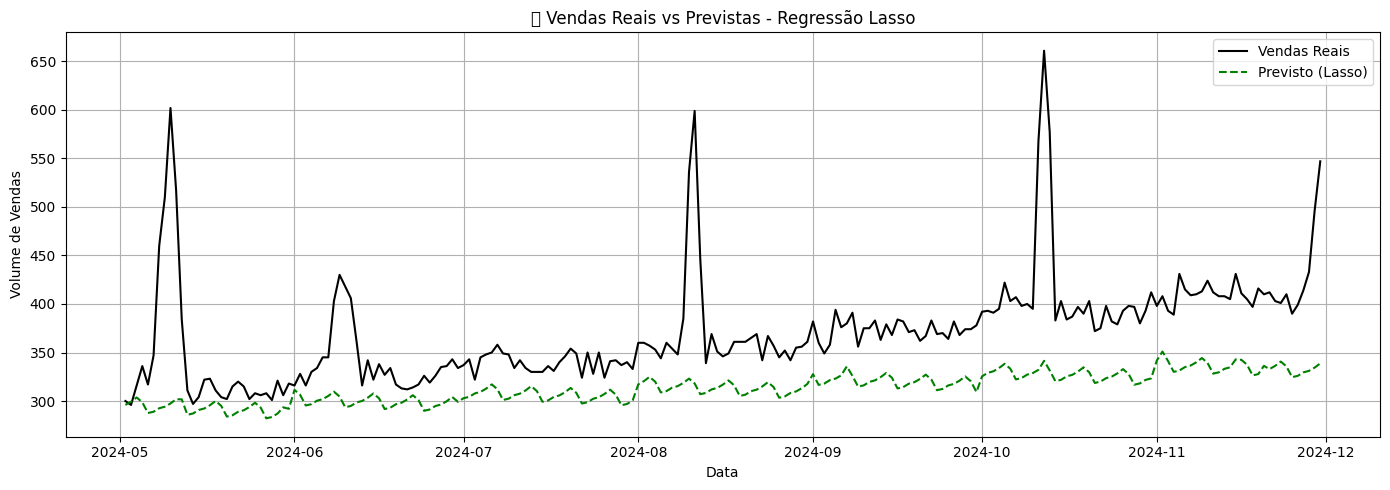

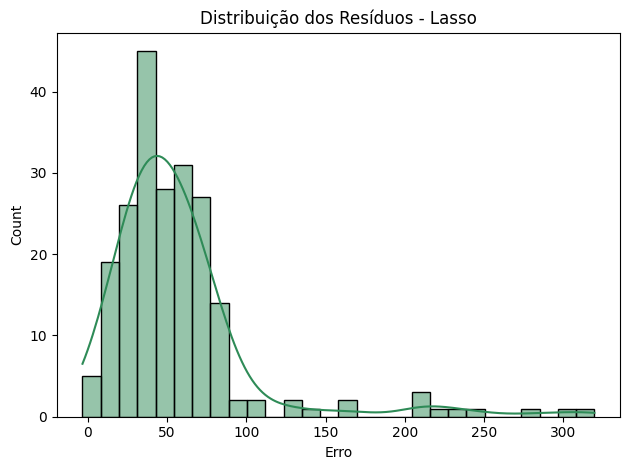


üìè Teste de Shapiro-Wilk:
Estat√≠stica = 0.6898, p-valor = 0.0000
‚ö†Ô∏è Res√≠duos N√ÉO seguem distribui√ß√£o normal.


/tmp/ipython-input-49-1279019834.py:133: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


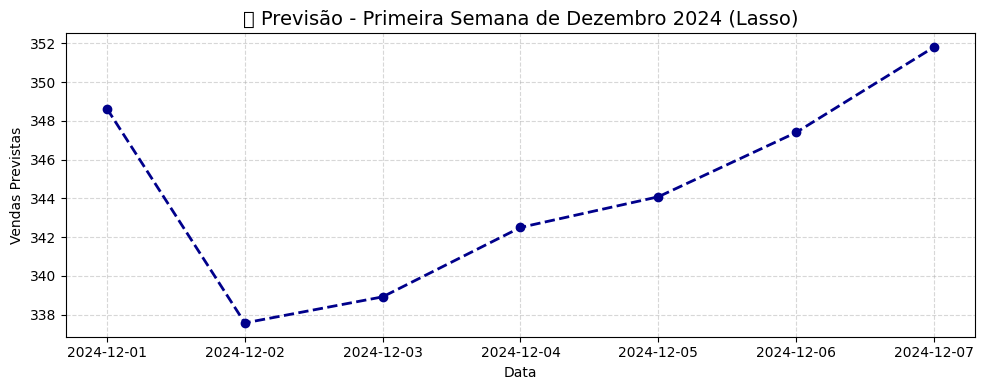

In [49]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro

# üì• Leitura dos Dados
df = pd.read_excel('/content/Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# üéØ Sele√ß√£o das vari√°veis relevantes
colunas_uteis = [
    'Ano', 'M√™s', 'Dia', 'Feriado', 'Fim de Semana',
    'Dia_da_Semana_Segunda', 'Dia_da_Semana_Ter√ßa', 'Dia_da_Semana_Quarta',
    'Dia_da_Semana_Quinta', 'Dia_da_Semana_Sexta',
    'Final_de_Semana_S√°bado', 'Final_de_Semana_Domingo'
]
# Handle 'Feriado' column which contains 'Feriado' string
df['Feriado'] = df['Feriado'].replace({'Sim': 1, 'N√£o': 0, 'Feriado': 1, 'Dia comum': 0}).astype(int)
X_lasso = df[colunas_uteis].astype(float)

y_lasso = df['Vendas'].astype(float)

# ‚è≥ Divis√£o temporal 80/20
n_test = int(len(df) * 0.2)
X_train_lasso, X_test_lasso = X_lasso.iloc[:-n_test], X_lasso.iloc[-n_test:]
y_train_lasso, y_test_lasso = y_lasso.iloc[:-n_test], y_lasso.iloc[-n_test:]

# üîß Espa√ßo de busca para alpha
param_grid = {'alpha': np.logspace(-4, 0, 50)}
tscv = TimeSeriesSplit(n_splits=5)

# ‚öôÔ∏è Ajuste do modelo com valida√ß√£o cruzada
lasso_cv = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv
)
lasso_cv.fit(X_train_lasso, y_train_lasso)
melhor_lasso = lasso_cv.best_estimator_

# ‚úÖ Previs√£o no conjunto de teste
y_pred_lasso = melhor_lasso.predict(X_test_lasso)

# üìä Avalia√ß√£o
mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, y_pred_lasso))
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

print("=== AVALIA√á√ÉO REGRESS√ÉO LASSO ===")
print(f"Melhor alpha: {lasso_cv.best_params_['alpha']:.5f}")
print(f"MAE : {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R¬≤  : {r2_lasso:.4f}")

# üîç Coeficientes utilizados
coef_lasso = pd.Series(melhor_lasso.coef_, index=X_lasso.columns)
print("\nüìå Vari√°veis Selecionadas:")
print(coef_lasso[coef_lasso != 0].sort_values(ascending=False))

# üìà Gr√°fico Reais vs Previstas
plt.figure(figsize=(14, 5))
plt.plot(y_test_lasso.index, y_test_lasso, label='Vendas Reais', color='black')
plt.plot(y_test_lasso.index, y_pred_lasso, label='Previsto (Lasso)', linestyle='--', color='green')
plt.title('üìä Vendas Reais vs Previstas - Regress√£o Lasso')
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# üìâ Distribui√ß√£o dos res√≠duos
residuos_lasso = y_test_lasso - y_pred_lasso
sns.histplot(residuos_lasso, kde=True, color='seagreen')
plt.title('Distribui√ß√£o dos Res√≠duos - Lasso')
plt.xlabel('Erro')
plt.tight_layout()
plt.show()

# üìè Teste de normalidade
stat, p = shapiro(residuos_lasso)
print("\nüìè Teste de Shapiro-Wilk:")
print(f"Estat√≠stica = {stat:.4f}, p-valor = {p:.4f}")
print("‚úÖ Res√≠duos seguem distribui√ß√£o normal." if p > 0.05 else "‚ö†Ô∏è Res√≠duos N√ÉO seguem distribui√ß√£o normal.")

# üîÆ Previs√£o para 01-07 de Dezembro de 2024
datas_futuro = pd.date_range(start='2024-12-01', end='2024-12-07')
df_futuro = pd.DataFrame({'Data': datas_futuro})
df_futuro['Ano'] = df_futuro['Data'].dt.year
df_futuro['M√™s'] = df_futuro['Data'].dt.month
df_futuro['Dia'] = df_futuro['Data'].dt.day
df_futuro['Dia_da_Semana'] = df_futuro['Data'].dt.day_name()
df_futuro['Feriado'] = 0
df_futuro['Fim de Semana'] = df_futuro['Dia_da_Semana'].isin(['Saturday', 'Sunday']).astype(int)

# Criar colunas dummy manualmente
dias_dummies = {
    'Dia_da_Semana_Segunda': 'Monday',
    'Dia_da_Semana_Ter√ßa': 'Tuesday',
    'Dia_da_Semana_Quarta': 'Wednesday',
    'Dia_da_Semana_Quinta': 'Thursday',
    'Dia_da_Semana_Sexta': 'Friday',
    'Final_de_Semana_S√°bado': 'Saturday',
    'Final_de_Semana_Domingo': 'Sunday',
}
for col, dia in dias_dummies.items():
    df_futuro[col] = (df_futuro['Dia_da_Semana'] == dia).astype(int)

# Preencher demais colunas
X_futuro = df_futuro[colunas_uteis].astype(float)
y_pred_futuro = melhor_lasso.predict(X_futuro)

# üìä Resultado da previs√£o
df_resultado = pd.DataFrame({
    'Data': datas_futuro,
    'Previs√£o_Vendas': y_pred_futuro
}).set_index('Data')

# üìà Gr√°fico de previs√£o futura
plt.figure(figsize=(10, 4))
plt.plot(df_resultado.index, df_resultado['Previs√£o_Vendas'], marker='o', linestyle='--', color='darkblue', linewidth=2)
plt.title('üîÆ Previs√£o - Primeira Semana de Dezembro 2024 (Lasso)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Vendas Previstas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

=== Avalia√ß√£o Regress√£o Lasso ===
üîß Melhor alpha: 0.00010
MAE  : 57.65
RMSE : 75.33
R¬≤   : -0.8470

üîç Vari√°veis Selecionadas pelo Lasso:


Ano                        96.825043
M√™s                         6.985128
Final_de_Semana_S√°bado      5.000739
Feriado.1                   4.862152
Dia_da_Semana_Sexta         3.578038
Fim de Semana               3.242513
Final_de_Semana_Domingo     0.254458
Dia                        -0.261029
Dia_da_Semana_Quarta       -1.842303
Dia_da_Semana_Ter√ßa        -5.683649
Dia_da_Semana_Segunda      -7.290589
dtype: float64

/tmp/ipython-input-50-2754611687.py:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


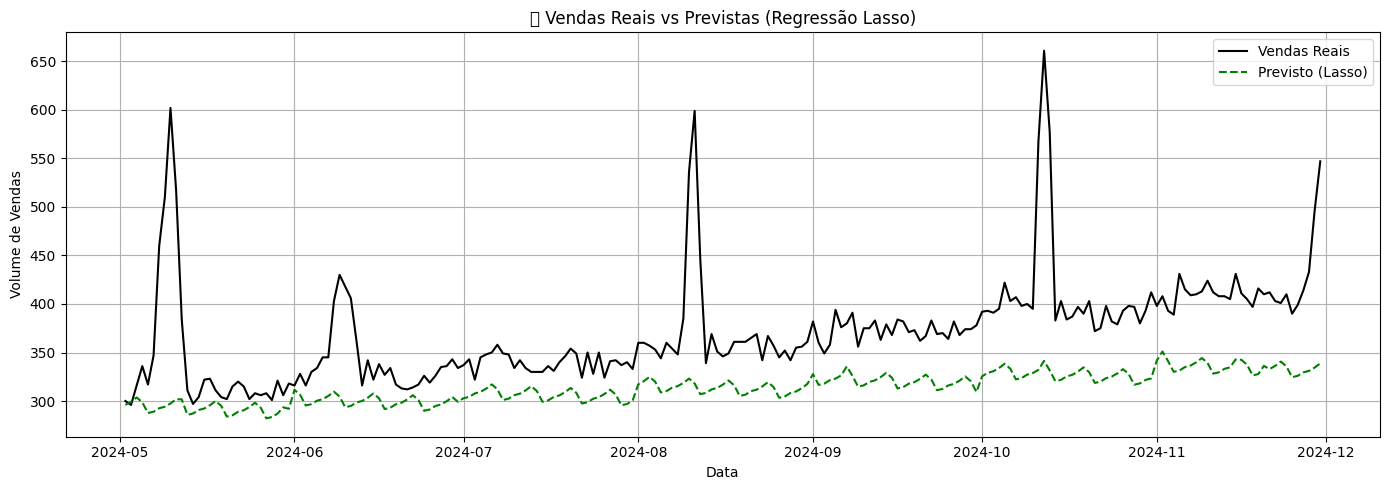

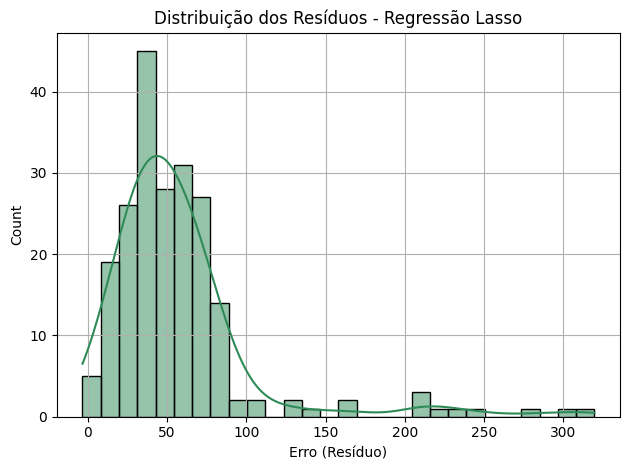


üìä Teste de Shapiro-Wilk (normalidade dos res√≠duos):
Estat√≠stica = 0.6898, p-valor = 0.0000
‚ö†Ô∏è Os res√≠duos N√ÉO seguem distribui√ß√£o normal.


In [50]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro

# üì• Leitura dos dados
df = pd.read_excel('/content/Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')

# üìÖ Tratamento da data
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# üéØ Vari√°vel dependente
y_lasso = df['Vendas'].astype(float)

# ‚úÖ Vari√°veis preditoras (mantendo vari√°veis temporais + dummies)
X_lasso = df.drop(columns=['Vendas']).select_dtypes(include=['int64', 'float64']).astype(float)

# ‚è≥ Divis√£o temporal: 80% treino, 20% teste
n_test = int(len(df) * 0.2)
X_train_lasso, X_test_lasso = X_lasso.iloc[:-n_test], X_lasso.iloc[-n_test:]
y_train_lasso, y_test_lasso = y_lasso.iloc[:-n_test], y_lasso.iloc[-n_test:]

# üîç Grid de valores para alpha
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# üß™ Valida√ß√£o cruzada com s√©ries temporais
tscv = TimeSeriesSplit(n_splits=5)

# ‚öôÔ∏è Lasso com Grid Search
lasso_cv = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv
)
lasso_cv.fit(X_train_lasso, y_train_lasso)

# ‚úÖ Melhor modelo e previs√µes
melhor_lasso = lasso_cv.best_estimator_
y_pred_lasso = melhor_lasso.predict(X_test_lasso)

# üìè Avalia√ß√£o
mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, y_pred_lasso))
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

print("=== Avalia√ß√£o Regress√£o Lasso ===")
print(f"üîß Melhor alpha: {lasso_cv.best_params_['alpha']:.5f}")
print(f"MAE  : {mae_lasso:.2f}")
print(f"RMSE : {rmse_lasso:.2f}")
print(f"R¬≤   : {r2_lasso:.4f}")

# üìå Coeficientes relevantes
coef_lasso = pd.Series(melhor_lasso.coef_, index=X_lasso.columns)
coef_utilizados = coef_lasso[coef_lasso != 0].sort_values(ascending=False)

print("\nüîç Vari√°veis Selecionadas pelo Lasso:")
display(coef_utilizados)

# üìà Gr√°fico: Reais vs Previstas
plt.figure(figsize=(14, 5))
plt.plot(y_test_lasso.index, y_test_lasso, label='Vendas Reais', color='black')
plt.plot(y_test_lasso.index, y_pred_lasso, label='Previsto (Lasso)', linestyle='--', color='green')
plt.title('üìä Vendas Reais vs Previstas (Regress√£o Lasso)')
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# üìâ Gr√°fico: Res√≠duos
residuos_lasso = y_test_lasso - y_pred_lasso
sns.histplot(residuos_lasso, kde=True, color='seagreen')
plt.title('Distribui√ß√£o dos Res√≠duos - Regress√£o Lasso')
plt.xlabel('Erro (Res√≠duo)')
plt.grid(True)
plt.tight_layout()
plt.show()

# üìè Teste de Normalidade dos Res√≠duos
stat, p = shapiro(residuos_lasso)
print(f"\nüìä Teste de Shapiro-Wilk (normalidade dos res√≠duos):")
print(f"Estat√≠stica = {stat:.4f}, p-valor = {p:.4f}")
if p > 0.05:
    print("‚úÖ Os res√≠duos seguem distribui√ß√£o normal.")
else:
    print("‚ö†Ô∏è Os res√≠duos N√ÉO seguem distribui√ß√£o normal.")


üîé Avalia√ß√£o Random Forest:
MAE : 69.91
RMSE: 88.70
R¬≤  : -1.5610
üìå Melhores Hiperpar√¢metros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


/tmp/ipython-input-47-2177362589.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


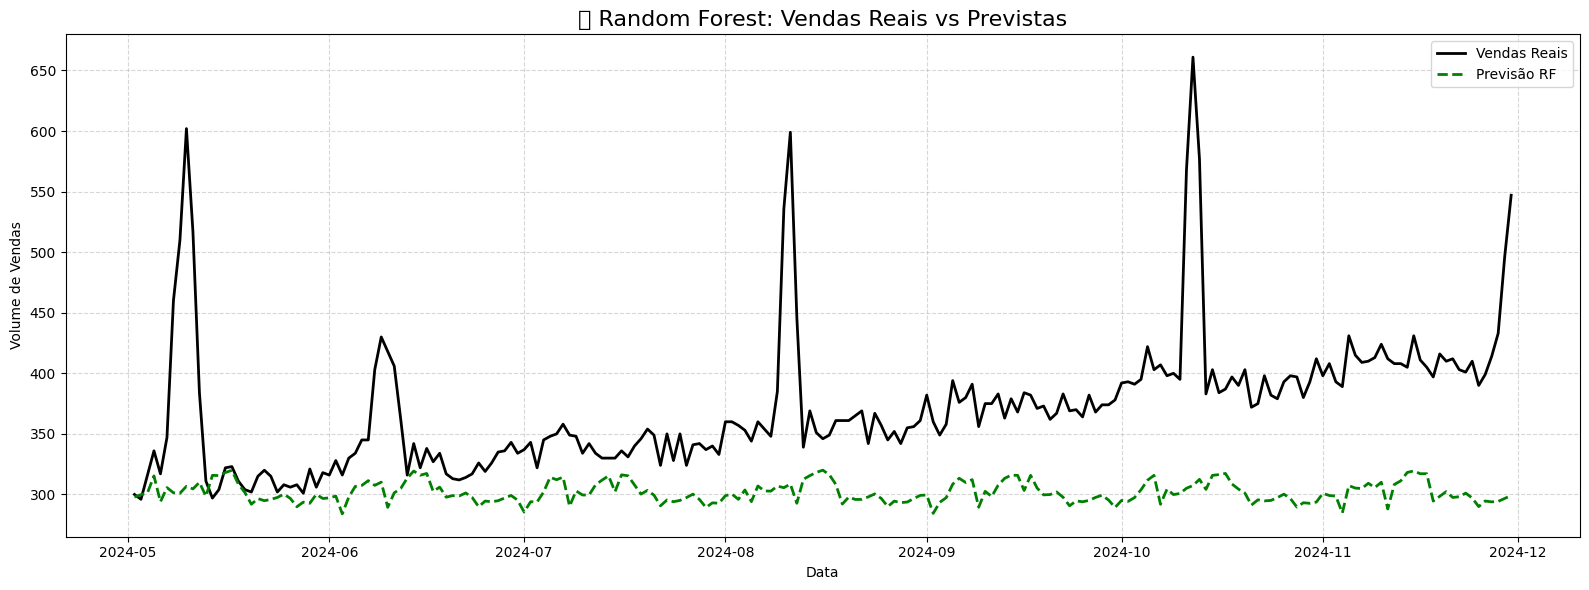

/tmp/ipython-input-47-2177362589.py:74: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


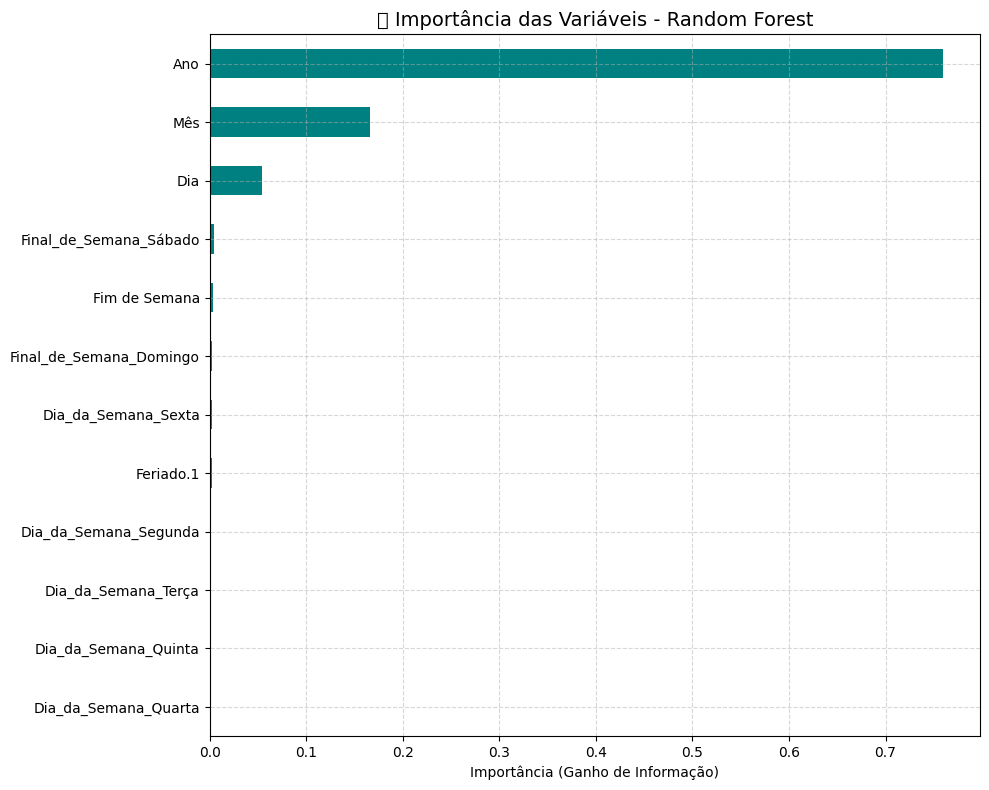

/tmp/ipython-input-47-2177362589.py:112: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


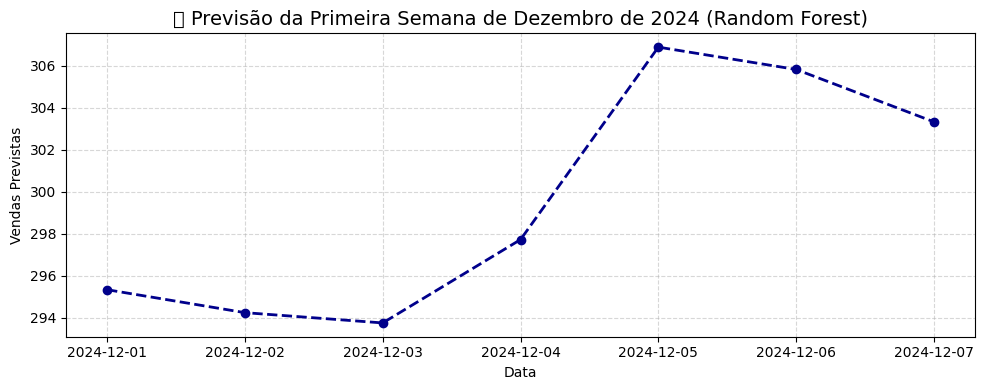

In [47]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# üì• Leitura dos dados
df = pd.read_excel('/content/Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# üéØ Vari√°veis
y = df['Vendas'].astype(float)
X = df.drop(columns=['Vendas']).select_dtypes(include=['int64', 'float64']).astype(float)

# ‚è≥ Divis√£o temporal
n_test = int(len(df) * 0.2)
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]

# üîß Hiperpar√¢metros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
tscv = TimeSeriesSplit(n_splits=5)

# ‚öôÔ∏è Modelo
rf_model = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf_model, param_grid=param_grid, cv=tscv,
                       scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
melhor_rf = grid_rf.best_estimator_

# ‚úÖ Previs√£o
y_pred_rf = melhor_rf.predict(X_test)

# üìä Avalia√ß√£o
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("üîé Avalia√ß√£o Random Forest:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤  : {r2:.4f}")
print("üìå Melhores Hiperpar√¢metros:", grid_rf.best_params_)

# üìà Gr√°fico Vendas Reais vs Previstas
plt.figure(figsize=(16, 6))
plt.plot(y_test.index, y_test, label='Vendas Reais', color='black', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Previs√£o RF', linestyle='--', color='green', linewidth=2)
plt.title('üìä Random Forest: Vendas Reais vs Previstas', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# üìå Import√¢ncia das Vari√°veis
importances = pd.Series(melhor_rf.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='teal')
plt.title('üìå Import√¢ncia das Vari√°veis - Random Forest', fontsize=14)
plt.xlabel('Import√¢ncia (Ganho de Informa√ß√£o)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# üîÆ Gera√ß√£o de dados para a primeira semana de dezembro de 2024
datas_futuro = pd.date_range(start='2024-12-01', end='2024-12-07', freq='D')
df_futuro = pd.DataFrame({'Data': datas_futuro})
df_futuro['Ano'] = df_futuro['Data'].dt.year
df_futuro['M√™s'] = df_futuro['Data'].dt.month
df_futuro['Dia'] = df_futuro['Data'].dt.day
df_futuro['Dia_da_Semana'] = df_futuro['Data'].dt.day_name()

# Recreate dummy variables for the future data to match the training data columns
df_futuro = pd.get_dummies(df_futuro, columns=['Dia_da_Semana'], drop_first=True)

# Ensure all columns from the training data are present in the future data, filling missing with 0
for col in X_train.columns:
    if col not in df_futuro.columns:
        df_futuro[col] = 0

# Select and reorder columns to match the training data (excluding 'const' if present)
X_futuro = df_futuro[X_train.columns.drop('const', errors='ignore')].astype(float)

# ‚úÖ Gera√ß√£o da previs√£o para o futuro
y_pred_futuro = melhor_rf.predict(X_futuro)

# üìä Resultado da previs√£o
df_previsao = pd.DataFrame({
    'Data': datas_futuro,
    'Previs√£o_Vendas': y_pred_futuro
}).set_index('Data')

# üìà Gr√°fico da previs√£o da primeira semana de dezembro
plt.figure(figsize=(10, 4))
plt.plot(df_previsao.index, df_previsao['Previs√£o_Vendas'], marker='o', linestyle='--', color='darkblue', linewidth=2)
plt.title('üîÆ Previs√£o da Primeira Semana de Dezembro de 2024 (Random Forest)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Vendas Previstas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()